# Clean Memory that is No Longer Used

-----------------------------------------------

In [64]:
#force garbage collecetion for memory management

import gc

# Perform garbage collection
gc.collect()

37581

-----------------------------------------------
# Import Necessary Libraries

-----------------------------------------------

In [74]:
import os
import cv2
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

-----------------------------------------------
# Import Dataset and Implement Data Pre-processing Techniques

-----------------------------------------------

In [67]:
# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

def load_and_preprocess_data_with_contrast(data_dir):
    images = []
    labels = []
    tumor_types = os.listdir(data_dir)
    
    for i, tumor_type in enumerate(tumor_types):
        tumor_path = os.path.join(data_dir, tumor_type)
        
        for img_file in os.listdir(tumor_path):

            # Read images in grayscale
            img_path = os.path.join(tumor_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Noise reduction with Gaussian Blur
            img = cv2.GaussianBlur(img, (3, 3), 0)
            
            # Contrast enhancement using CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            img = clahe.apply(img)
            
            # Thresholding
            _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            
            # Image Conversion and Normalization
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img / 255.0
            
            images.append(img)
            labels.append(i)
    
    return np.array(images), np.array(labels)

# Load and preprocess data
train_data_dir = 'Training'
test_data_dir = 'Testing'

X_train, y_train = load_and_preprocess_data_with_contrast(train_data_dir)
X_test, y_test = load_and_preprocess_data_with_contrast(test_data_dir)

# Count occurrences of each label in y_train
class_counts_train = np.bincount(y_train)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

# Display the counts for each class in training data
for i, count in enumerate(class_counts_train):
    print(f"Training - Tumor Type {i}: {int(count)} images")

# Count occurrences of each label in y_test
class_counts_test = np.bincount(y_test)

# Display the counts for each class in testing data
for i, count in enumerate(class_counts_test):
    print(f"Testing - Tumor Type {i}: {int(count)} images")

Training - Tumor Type 0: 826 images
Training - Tumor Type 1: 822 images
Training - Tumor Type 2: 395 images
Training - Tumor Type 3: 827 images
Testing - Tumor Type 0: 97 images
Testing - Tumor Type 1: 86 images
Testing - Tumor Type 2: 26 images
Testing - Tumor Type 3: 78 images


-----------------------------------------------
# Visualize Image Count for Training and Testing Sets

-----------------------------------------------

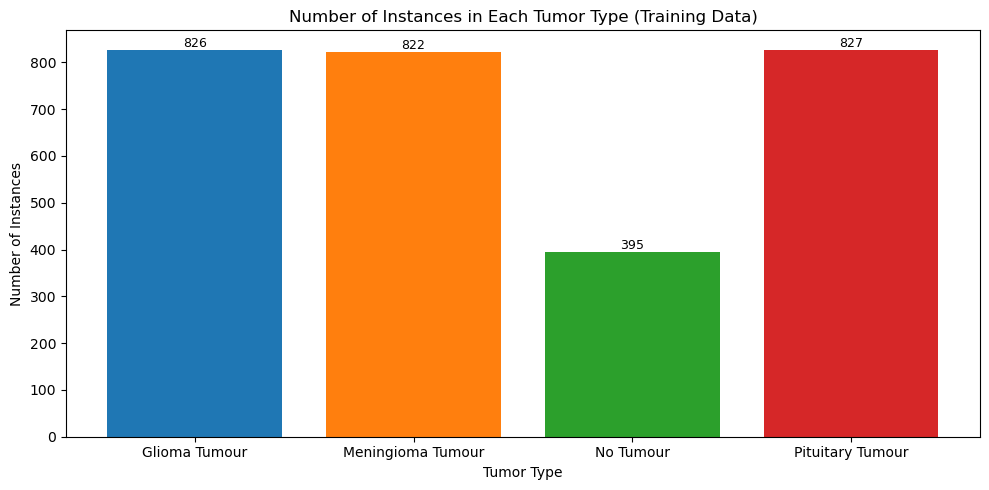

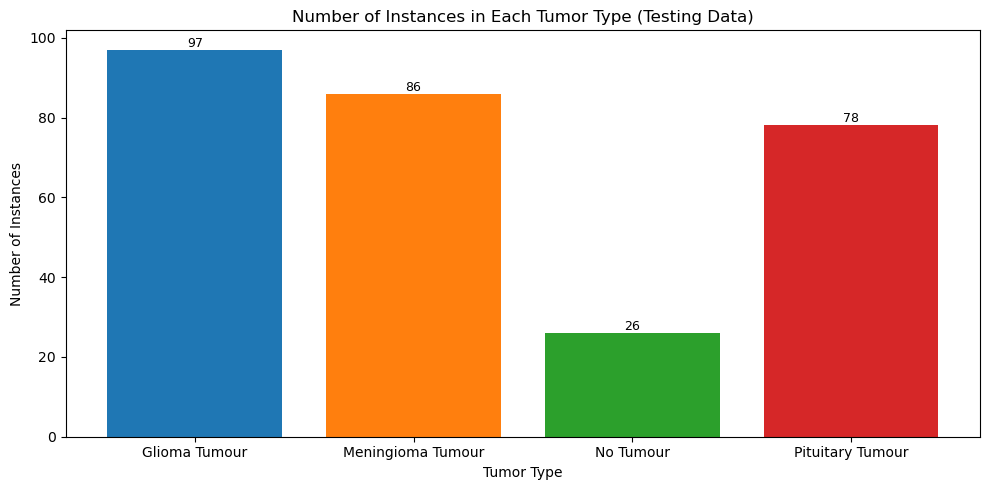

In [68]:
# Define tumor types
class_labels = ['Glioma Tumour', 'Meningioma Tumour', 'No Tumour', 'Pituitary Tumour']
num_tumor_types = len(class_labels)

# Generate colors for each class
colors = plt.cm.tab10(np.arange(num_tumor_types))

# Plot bar chart for training data
plt.figure(figsize=(10, 5))
bars_train = plt.bar(np.arange(num_tumor_types), class_counts_train, color=colors)
plt.title('Number of Instances in Each Tumor Type (Training Data)')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Instances')
plt.xticks(np.arange(num_tumor_types), class_labels)
plt.tight_layout()

# Add text labels for number of instances on each bar
for bar, count in zip(bars_train, class_counts_train):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=9, color='black')

plt.show()

# Plot bar chart for testing data
plt.figure(figsize=(10, 5))
bars_test = plt.bar(np.arange(num_tumor_types), class_counts_test, color=colors)
plt.title('Number of Instances in Each Tumor Type (Testing Data)')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Instances')
plt.xticks(np.arange(num_tumor_types), class_labels)
plt.tight_layout()

# Add text labels for number of instances on each bar
for bar, count in zip(bars_test, class_counts_test):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=9, color='black')

plt.show()

-----------------------------------------------
# Custom CNN Model with 3 Layers

-----------------------------------------------

In [ ]:
# Build the CNN model
model_cnn_modified = models.Sequential()

model_cnn_modified.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model_cnn_modified.add(layers.MaxPooling2D((2, 2)))


model_cnn_modified.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn_modified.add(layers.MaxPooling2D((2, 2)))


model_cnn_modified.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn_modified.add(layers.MaxPooling2D((2, 2)))

model_cnn_modified.add(layers.Flatten())
model_cnn_modified.add(layers.Dense(64, activation='relu'))
model_cnn_modified.add(layers.Dense(4, activation='softmax'))  

# Compile the model with sparse_categorical_crossentropy
model_cnn_modified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training set
history_cnn = model_cnn_modified.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_split=0.1)

# Evaluate the model on the test set
test_loss_cnn_modified, test_acc_cnn_modified = model_cnn_modified.evaluate(X_test, y_test)
print(f'Test Accuracy (3 Layer CNN): {test_acc_cnn_modified}')

Epoch 1/10
73/73 [==============================] - 21s 273ms/step - loss: 0.8724 - accuracy: 0.6304 - val_loss: 0.5613 - val_accuracy: 0.7838
Epoch 2/10
73/73 [==============================] - 19s 258ms/step - loss: 0.4684 - accuracy: 0.8141 - val_loss: 0.4469 - val_accuracy: 0.8224
Epoch 3/10
73/73 [==============================] - 19s 254ms/step - loss: 0.2816 - accuracy: 0.8898 - val_loss: 0.4175 - val_accuracy: 0.8571
Epoch 4/10
73/73 [==============================] - 18s 251ms/step - loss: 0.1595 - accuracy: 0.9376 - val_loss: 0.3971 - val_accuracy: 0.8378
Epoch 5/10
73/73 [==============================] - 19s 260ms/step - loss: 0.0868 - accuracy: 0.9725 - val_loss: 0.4109 - val_accuracy: 0.8649
Epoch 6/10
73/73 [==============================] - 18s 250ms/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.3421 - val_accuracy: 0.8842
Epoch 7/10
73/73 [==============================] - 18s 250ms/step - loss: 0.0393 - accuracy: 0.9854 - val_loss: 0.4473 - val_accuracy: 0.8649

-----------------------------------------------
# Custom CNN Model with 9 Layers

-----------------------------------------------

In [ ]:
# Custom CNN model with 9 layers
model_custom_9_layers = models.Sequential()

model_custom_9_layers.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model_custom_9_layers.add(layers.MaxPooling2D((2, 2)))

model_custom_9_layers.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_custom_9_layers.add(layers.MaxPooling2D((2, 2)))

model_custom_9_layers.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_custom_9_layers.add(layers.MaxPooling2D((2, 2)))

model_custom_9_layers.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_custom_9_layers.add(layers.MaxPooling2D((2, 2)))

model_custom_9_layers.add(layers.Flatten())
model_custom_9_layers.add(layers.Dense(512, activation='relu'))
model_custom_9_layers.add(layers.Dense(256, activation='relu'))
model_custom_9_layers.add(layers.Dense(4, activation='softmax')) 

# Compile the model with sparse_categorical_crossentropy
model_custom_9_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training set
history_c9l = model_custom_9_layers.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model on the test set
test_loss_custom_9_layers, test_acc_custom_9_layers = model_custom_9_layers.evaluate(X_test, y_test)
print(f'Test Accuracy (Custom CNN - 9 layers): {test_acc_custom_9_layers}')


Epoch 1/10
65/65 [==============================] - 42s 622ms/step - loss: 1.0106 - accuracy: 0.5629 - val_loss: 0.7284 - val_accuracy: 0.7041
Epoch 2/10
65/65 [==============================] - 38s 586ms/step - loss: 0.6033 - accuracy: 0.7599 - val_loss: 0.5640 - val_accuracy: 0.7718
Epoch 3/10
65/65 [==============================] - 40s 621ms/step - loss: 0.4470 - accuracy: 0.8127 - val_loss: 0.5719 - val_accuracy: 0.7698
Epoch 4/10
65/65 [==============================] - 39s 605ms/step - loss: 0.3038 - accuracy: 0.8843 - val_loss: 0.5256 - val_accuracy: 0.7872
Epoch 5/10
65/65 [==============================] - 40s 611ms/step - loss: 0.2007 - accuracy: 0.9274 - val_loss: 0.5158 - val_accuracy: 0.8046
Epoch 6/10
65/65 [==============================] - 41s 634ms/step - loss: 0.1496 - accuracy: 0.9419 - val_loss: 0.3932 - val_accuracy: 0.8627
Epoch 7/10
65/65 [==============================] - 43s 655ms/step - loss: 0.0814 - accuracy: 0.9748 - val_loss: 0.5652 - val_accuracy: 0.8162

-----------------------------------------------
# Pre-Trained VGG16 CNN Model

-----------------------------------------------

In [ ]:
# Load the pretrained VGG16 model without the top (fully connected) layers
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the pretrained layers so they are not trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a new model on top of the pretrained model
model_pretrained = models.Sequential()
model_pretrained.add(pretrained_model)
model_pretrained.add(layers.Flatten())
model_pretrained.add(layers.Dense(64, activation='relu'))
model_pretrained.add(layers.Dense(4, activation='softmax')) 

# Compile the pretrained model
model_pretrained.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the pretrained model on the training set
history_vgg16 = model_pretrained.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_split=0.1)

# Evaluate the pretrained model on the test set
test_loss_pretrained, test_acc_pretrained = model_pretrained.evaluate(X_test, y_test)
print(f'Test Accuracy (Pretrained VGG16): {test_acc_pretrained}')


Epoch 1/10
73/73 [==============================] - 83s 1s/step - loss: 0.7450 - accuracy: 0.7022 - val_loss: 0.5799 - val_accuracy: 0.7915
Epoch 2/10
73/73 [==============================] - 81s 1s/step - loss: 0.3908 - accuracy: 0.8528 - val_loss: 0.5768 - val_accuracy: 0.7606
Epoch 3/10
73/73 [==============================] - 85s 1s/step - loss: 0.2638 - accuracy: 0.9036 - val_loss: 0.4335 - val_accuracy: 0.8301
Epoch 4/10
73/73 [==============================] - 85s 1s/step - loss: 0.2060 - accuracy: 0.9333 - val_loss: 0.4211 - val_accuracy: 0.8263
Epoch 5/10
73/73 [==============================] - 84s 1s/step - loss: 0.1737 - accuracy: 0.9406 - val_loss: 0.3555 - val_accuracy: 0.8494
Epoch 6/10
73/73 [==============================] - 86s 1s/step - loss: 0.1552 - accuracy: 0.9479 - val_loss: 0.3652 - val_accuracy: 0.8533
Epoch 7/10
73/73 [==============================] - 87s 1s/step - loss: 0.1001 - accuracy: 0.9750 - val_loss: 0.4070 - val_accuracy: 0.8649
Epoch 8/10
73/73 [==

-----------------------------------------------
# Pre-Trained VGG19 CNN Model

-----------------------------------------------

In [ ]:
# Load the pretrained VGG19 model without the top (fully connected) layers
pretrained_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the pretrained layers so they are not trainable
for layer in pretrained_model_vgg19.layers:
    layer.trainable = False

# Create a new model on top of the pretrained VGG19 model
model_pretrained_vgg19 = models.Sequential()
model_pretrained_vgg19.add(pretrained_model_vgg19)
model_pretrained_vgg19.add(layers.Flatten())
model_pretrained_vgg19.add(layers.Dense(64, activation='relu'))
model_pretrained_vgg19.add(layers.Dense(4, activation='softmax'))  

# Compile the pretrained VGG19 model
model_pretrained_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the pretrained VGG19 model on the training set
history_vgg19 = model_pretrained_vgg19.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_split=0.1)

# Evaluate the pretrained VGG19 model on the test set
test_loss_pretrained_vgg19, test_acc_pretrained_vgg19 = model_pretrained_vgg19.evaluate(X_test, y_test)
print(f'Test Accuracy (Pretrained VGG19): {test_acc_pretrained_vgg19}')


Epoch 1/10
73/73 [==============================] - 109s 1s/step - loss: 0.7942 - accuracy: 0.6872 - val_loss: 0.5298 - val_accuracy: 0.7915
Epoch 2/10
73/73 [==============================] - 99s 1s/step - loss: 0.4207 - accuracy: 0.8425 - val_loss: 0.4475 - val_accuracy: 0.8263
Epoch 3/10
73/73 [==============================] - 94s 1s/step - loss: 0.3254 - accuracy: 0.8696 - val_loss: 0.5037 - val_accuracy: 0.8031
Epoch 4/10
73/73 [==============================] - 94s 1s/step - loss: 0.2294 - accuracy: 0.9165 - val_loss: 0.4197 - val_accuracy: 0.8108
Epoch 5/10
73/73 [==============================] - 91s 1s/step - loss: 0.1921 - accuracy: 0.9376 - val_loss: 0.3725 - val_accuracy: 0.8571
Epoch 6/10
73/73 [==============================] - 93s 1s/step - loss: 0.1645 - accuracy: 0.9466 - val_loss: 0.3583 - val_accuracy: 0.8610
Epoch 7/10
73/73 [==============================] - 96s 1s/step - loss: 0.1319 - accuracy: 0.9634 - val_loss: 0.4024 - val_accuracy: 0.8533
Epoch 8/10
73/73 [=

-----------------------------------------------
# 3 Layer CNN Model Evaluation Matrix

-----------------------------------------------

9/9 [==============================] - 1s 96ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        97
           1       0.80      0.85      0.82        86
           2       0.91      0.81      0.86        26
           3       0.90      0.92      0.91        78

    accuracy                           0.87       287
   macro avg       0.88      0.86      0.87       287
weighted avg       0.88      0.87      0.87       287


Class 0 (Class 0):
  Correct Predictions (TP): 85
  False Positives (FP): 8
  False Negatives (FN): 12
  True Negatives (TN): 182

Class 1 (Class 1):
  Correct Predictions (TP): 73
  False Positives (FP): 18
  False Negatives (FN): 13
  True Negatives (TN): 183

Class 2 (Class 2):
  Correct Predictions (TP): 21
  False Positives (FP): 2
  False Negatives (FN): 5
  True Negatives (TN): 259

Class 3 (Class 3):
  Correct Predictions (TP): 72
  False Positives (FP): 8
  Fals

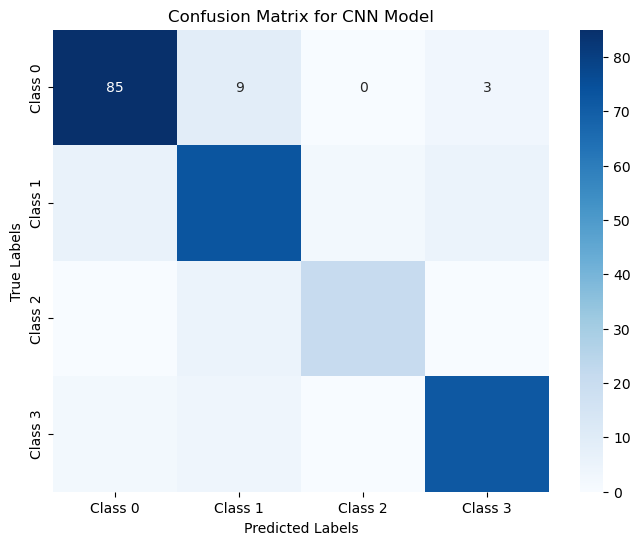

In [84]:
# Predictions for CNN Model
y_pred_cnn = model_cnn_modified.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Classification Report for CNN Model
print("Classification Report for CNN Model:")
print(classification_report(y_test, y_pred_cnn))


# Calculate and print the number of correct and wrong predictions for each class
for i, label in enumerate(class_labels):
    TP = np.sum((y_test == i) & (y_pred_cnn == i))
    FP = np.sum((y_test != i) & (y_pred_cnn == i))  
    FN = np.sum((y_test == i) & (y_pred_cnn != i))
    TN = np.sum((y_test != i) & (y_pred_cnn != i))
    
    print(f"\nClass {i} ({label}):")
    print(f"  Correct Predictions (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  True Negatives (TN): {TN}")

# Calculate and print the accuracy for each class
for i, label in enumerate(class_labels):
    correct_predictions = np.sum((y_test == i) & (y_pred_cnn == i))
    total_predictions = np.sum(y_test == i)
    accuracy = correct_predictions / total_predictions if total_predictions != 0 else 0
    
    print(f"\nAccuracy for {label}: {accuracy}")

# Confusion Matrix for custom 3 layers cnn Model
print("Confusion Matrix for VGG16 Model:")
print(confusion_matrix(y_test,y_pred_cnn ))

conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Create DataFrame for the confusion matrix
df_cm_cnn = pd.DataFrame(conf_matrix_cnn, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


-----------------------------------------------
# 9 Layer CNN Model Evaluation Matrix

-----------------------------------------------

9/9 [==============================] - 1s 128ms/step
Classification Report for 9-layer CNN Model:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        97
           1       0.90      0.73      0.81        86
           2       0.84      0.81      0.82        26
           3       0.93      0.85      0.89        78

    accuracy                           0.85       287
   macro avg       0.86      0.84      0.84       287
weighted avg       0.86      0.85      0.85       287


Class 0 (Class 0):
  Correct Predictions (TP): 94
  False Positives (FP): 27
  False Negatives (FN): 3
  True Negatives (TN): 163

Class 1 (Class 1):
  Correct Predictions (TP): 63
  False Positives (FP): 7
  False Negatives (FN): 23
  True Negatives (TN): 194

Class 2 (Class 2):
  Correct Predictions (TP): 21
  False Positives (FP): 4
  False Negatives (FN): 5
  True Negatives (TN): 257

Class 3 (Class 3):
  Correct Predictions (TP): 66
  False Positives (FP): 

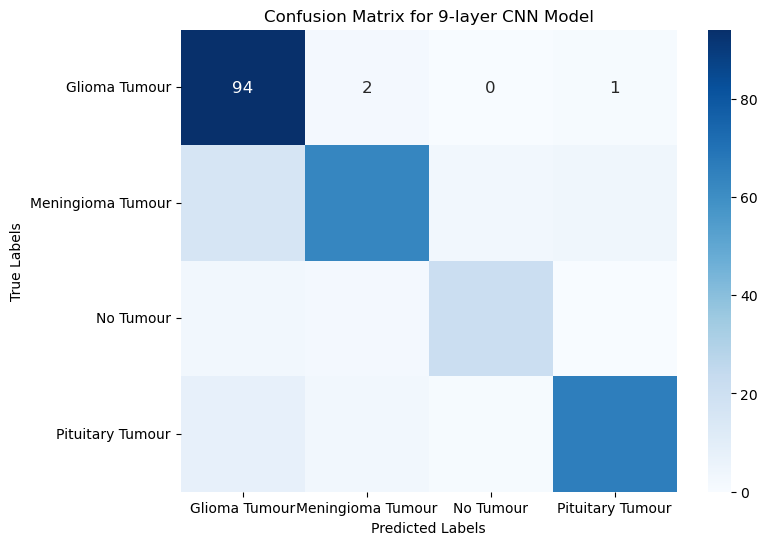

In [85]:
# Predictions for 9-layer CNN Model
y_pred_custom_9_layers = model_custom_9_layers.predict(X_test)
y_pred_custom_9_layers = np.argmax(y_pred_custom_9_layers, axis=1)

# Classification Report for 9-layer CNN Model
print("Classification Report for 9-layer CNN Model:")
print(classification_report(y_test, y_pred_custom_9_layers))

# Calculate and print the number of correct and wrong predictions for each class
for i, label in enumerate(class_labels):
    TP = np.sum((y_test == i) & (y_pred_custom_9_layers == i))
    FP = np.sum((y_test != i) & (y_pred_custom_9_layers == i))
    FN = np.sum((y_test == i) & (y_pred_custom_9_layers != i))
    TN = np.sum((y_test != i) & (y_pred_custom_9_layers != i))
    
    print(f"\nClass {i} ({label}):")
    print(f"  Correct Predictions (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  True Negatives (TN): {TN}")

# Calculate and print the accuracy for each class
class_labels = ['Glioma Tumour', 'Meningioma Tumour', 'No Tumour', 'Pituitary Tumour']  # Update with your class labels
for i, label in enumerate(class_labels):
    correct_predictions = np.sum((y_test == i) & (y_pred_custom_9_layers == i))
    total_predictions = np.sum(y_test == i)
    accuracy = correct_predictions / total_predictions if total_predictions != 0 else 0
    
    print(f"\nAccuracy for {label}: {accuracy}")

# Confusion Matrix for custom 9 layers cnn Model
print("Confusion Matrix for VGG16 Model:")
print(confusion_matrix(y_test, y_pred_custom_9_layers))

# Generate confusion matrix
conf_matrix_custom_9_layers = confusion_matrix(y_test, y_pred_custom_9_layers)

# Define class labels
class_labels = ['Glioma Tumour', 'Meningioma Tumour', 'No Tumour', 'Pituitary Tumour']  # Update with your class labels

# Create DataFrame for the confusion matrix
df_cm_custom_9_layers = pd.DataFrame(conf_matrix_custom_9_layers, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_custom_9_layers, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix for 9-layer CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

-----------------------------------------------
# VGG16 CNN Model Evaluation Matrix

-----------------------------------------------

9/9 [==============================] - 11s 1s/step
Classification Report for VGG16 Model:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        97
           1       0.85      0.84      0.84        86
           2       0.93      0.96      0.94        26
           3       0.90      0.94      0.92        78

    accuracy                           0.89       287
   macro avg       0.89      0.90      0.90       287
weighted avg       0.88      0.89      0.88       287


Class 0 (Glioma Tumour):
  Correct Predictions (TP): 84
  False Positives (FP): 10
  False Negatives (FN): 13
  True Negatives (TN): 180

Class 1 (Meningioma Tumour):
  Correct Predictions (TP): 72
  False Positives (FP): 13
  False Negatives (FN): 14
  True Negatives (TN): 188

Class 2 (No Tumour):
  Correct Predictions (TP): 25
  False Positives (FP): 2
  False Negatives (FN): 1
  True Negatives (TN): 259

Class 3 (Pituitary Tumour):
  Correct Predictions (TP): 73
  F

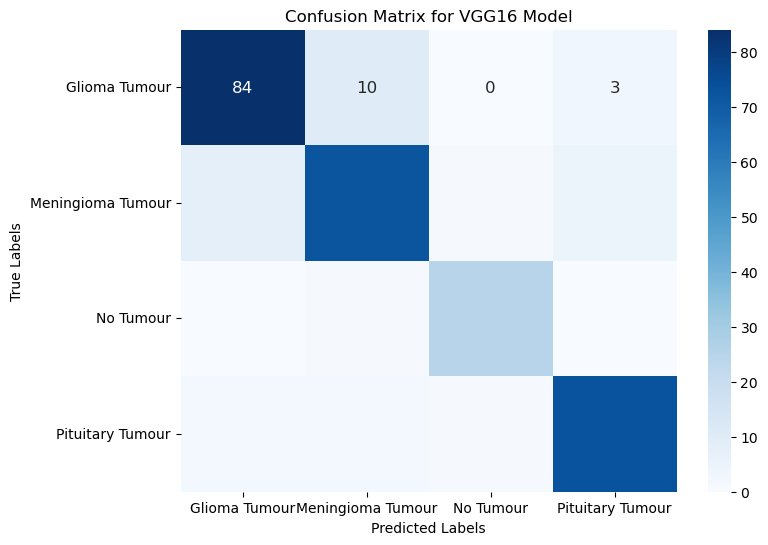

In [86]:
# Predictions for VGG16 Model
y_pred_vgg = model_pretrained.predict(X_test)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

# Classification Report for VGG16 Model
print("Classification Report for VGG16 Model:")
print(classification_report(y_test, y_pred_vgg))

# Calculate and print the number of correct and wrong predictions for each class
for i, label in enumerate(class_labels):
    TP = np.sum((y_test == i) & (y_pred_vgg == i))
    FP = np.sum((y_test != i) & (y_pred_vgg == i))
    FN = np.sum((y_test == i) & (y_pred_vgg != i))
    TN = np.sum((y_test != i) & (y_pred_vgg != i))
    
    print(f"\nClass {i} ({label}):")
    print(f"  Correct Predictions (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  True Negatives (TN): {TN}")

# Calculate and print the accuracy for each class
for i, label in enumerate(class_labels):
    correct_predictions = np.sum((y_test == i) & (y_pred_vgg == i))
    total_predictions = np.sum(y_test == i)
    accuracy = correct_predictions / total_predictions if total_predictions != 0 else 0
    
    print(f"\nAccuracy for {label}: {accuracy}")

# Confusion Matrix for VGG16 Model
print("Confusion Matrix for VGG16 Model:")
print(confusion_matrix(y_test, y_pred_vgg))

# Generate confusion matrix
conf_matrix_vgg16 = confusion_matrix(y_test, y_pred_vgg)

# Define class labels
class_labels = ['Glioma Tumour', 'Meningioma Tumour', 'No Tumour', 'Pituitary Tumour']  # Update with your class labels

# Create DataFrame for the confusion matrix
df_cm_vgg16 = pd.DataFrame(conf_matrix_vgg16, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_vgg16, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix for VGG16 Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

-----------------------------------------------
# VGG19 CNN Model Evaluation Matrix

-----------------------------------------------

9/9 [==============================] - 13s 1s/step
Classification Report for VGG19 Model:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        97
           1       0.86      0.80      0.83        86
           2       0.88      0.88      0.88        26
           3       0.93      0.91      0.92        78

    accuracy                           0.88       287
   macro avg       0.88      0.88      0.88       287
weighted avg       0.88      0.88      0.88       287


Class 0 (Glioma Tumour):
  Correct Predictions (TP): 89
  False Positives (FP): 16
  False Negatives (FN): 8
  True Negatives (TN): 174

Class 1 (Meningioma Tumour):
  Correct Predictions (TP): 69
  False Positives (FP): 11
  False Negatives (FN): 17
  True Negatives (TN): 190

Class 2 (No Tumour):
  Correct Predictions (TP): 23
  False Positives (FP): 3
  False Negatives (FN): 3
  True Negatives (TN): 258

Class 3 (Pituitary Tumour):
  Correct Predictions (TP): 71
  Fa

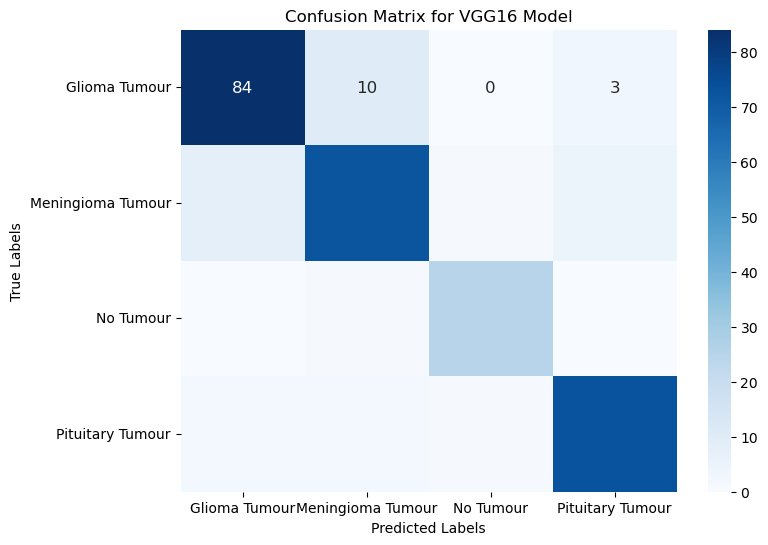

In [87]:
# Predictions for VGG19 Model
y_pred_vgg19 = model_pretrained_vgg19.predict(X_test)
y_pred_vgg19 = np.argmax(y_pred_vgg19, axis=1)

# Classification Report for VGG19 Model
print("Classification Report for VGG19 Model:")
print(classification_report(y_test, y_pred_vgg19))

# Calculate and print the number of correct and wrong predictions for each class
for i, label in enumerate(class_labels):
    TP = np.sum((y_test == i) & (y_pred_vgg19 == i))
    FP = np.sum((y_test != i) & (y_pred_vgg19 == i))
    FN = np.sum((y_test == i) & (y_pred_vgg19 != i))
    TN = np.sum((y_test != i) & (y_pred_vgg19 != i))
    
    print(f"\nClass {i} ({label}):")
    print(f"  Correct Predictions (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  True Negatives (TN): {TN}")


# Calculate and print the accuracy for each class
for i, label in enumerate(class_labels):
    correct_predictions = np.sum((y_test == i) & (y_pred_vgg19 == i))
    total_predictions = np.sum(y_test == i)
    accuracy = correct_predictions / total_predictions if total_predictions != 0 else 0
    
    print(f"\nAccuracy for {label}: {accuracy}")


# Confusion Matrix for VGG19 Model
print("Confusion Matrix for VGG16 Model:")
print(confusion_matrix(y_test, y_pred_vgg19))

# Generate confusion matrix
conf_matrix_vgg16 = confusion_matrix(y_test, y_pred_vgg)

# Define class labels
class_labels = ['Glioma Tumour', 'Meningioma Tumour', 'No Tumour', 'Pituitary Tumour']  # Update with your class labels

# Create DataFrame for the confusion matrix
df_cm_vgg16 = pd.DataFrame(conf_matrix_vgg16, index=class_labels, columns=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_vgg16, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix for VGG16 Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

-----------------------------------------------
# Training and Validation Accuracy Comparison for All Models

-----------------------------------------------

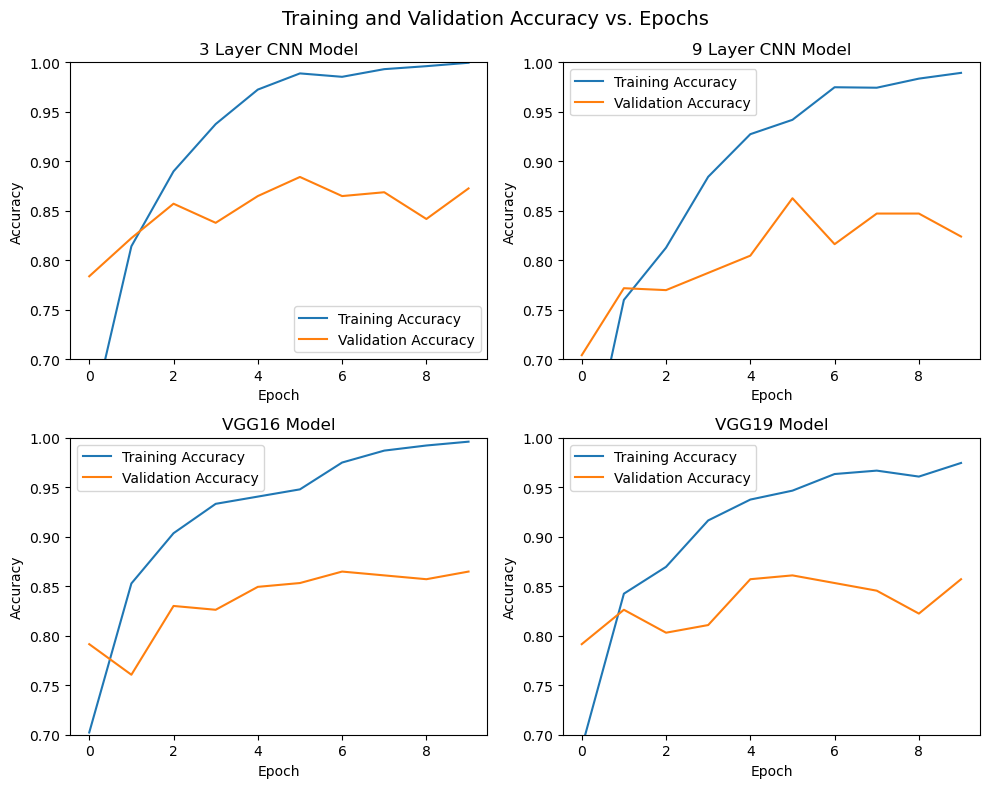

In [ ]:
# Create a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot accuracy for each model
histories = [history_cnn, history_c9l, history_vgg16, history_vgg19]


# Customize plot labels and titles
for i, ax in enumerate(axs.flat):
    ax.set_title(f"{model_names[i]} Model")
    ax.plot(histories[i].history['accuracy'], label='Training Accuracy')
    ax.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0.7, 1.0)
    ax.legend()

# Add overall title
fig.suptitle('Training and Validation Accuracy vs. Epochs', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()